In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
house_data = pd.read_csv(r"D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-1\kc_house_data.csv\kc_house_data.csv", parse_dates = ['date'])

In [3]:
house_data.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
house_data.info() # There are 21613 rows and there is no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [5]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Columns:
**id:** A notation for a house  
**date:** Date house was sold  
**price:** Price is prediction target  
**bedrooms:** Number of Bedrooms/House  
**bathrooms:** Number of bathrooms/House  
**sqft_living:** Square footage of the home  
**sqft_lot:** Square footage of the lot  
**floorsTotal:** Floors (levels) in house  
**waterfront:** House which has a view to a waterfront  
**view:** Has been viewed  
**condition:** How good the condition is ( Overall )  
**grade:** Overall grade given to the housing unit, based on King County grading system  
**sqft_above:** Square footage of house apart from basement  
**sqft_basement:** Square footage of the basement  
**yr_built:** Built Year  
**yr_renovated:** Year when house was renovated  
**zipcode:** Zip Code  
**lat:** Latitude coordinate  
**long:** Longitude coordinate  
**sqft_living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area  
**sqft_lot15:** LotSize area in 2015(implies-- some renovations)  

**TOTAL VIEW QUALITY:** This is the sum of all view's quality. The view's quality can vary from 0 to 4, in 5 different categories; Puget Sound, City/Territorial, Lake Washington/Sammamish, Mountain, and Small Lake/River. https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=k  

**VIEW:** For each classification will display blank for no view or "Fair", "Average", "Good" or "Excellent" to reflect the quality of view for that unit.(0	Unknown, 1	Fair, 2	Average, 3	Good, 4	Excellent)  
 https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=k   

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

In [6]:
len(house_data.id.unique())

21436

In [7]:
house_data_duplicates = house_data[house_data.duplicated('id')]
house_data_duplicates #There are 177 dublicated rows.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0,0,...,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242
824,726049190,2015-02-18,431000.0,3,1.00,1810,7200,1.0,0,0,...,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0,0,...,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479
1086,9834200885,2015-04-20,550000.0,4,2.50,2080,4080,1.0,0,0,...,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080
1129,8062900070,2015-02-13,369000.0,5,1.50,2550,6300,1.0,0,0,...,7,1560,990,1959,0,98056,47.5014,-122.172,1380,6300


In [8]:
house_data.drop_duplicates(['id'], keep = 'last', inplace=True) # There are 177 dublicated rows. I kept the last entries.

In [9]:
h_data = house_data
h_data.reset_index(drop=True, inplace=True)
h_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 21 columns):
id               21436 non-null int64
date             21436 non-null datetime64[ns]
price            21436 non-null float64
bedrooms         21436 non-null int64
bathrooms        21436 non-null float64
sqft_living      21436 non-null int64
sqft_lot         21436 non-null int64
floors           21436 non-null float64
waterfront       21436 non-null int64
view             21436 non-null int64
condition        21436 non-null int64
grade            21436 non-null int64
sqft_above       21436 non-null int64
sqft_basement    21436 non-null int64
yr_built         21436 non-null int64
yr_renovated     21436 non-null int64
zipcode          21436 non-null int64
lat              21436 non-null float64
long             21436 non-null float64
sqft_living15    21436 non-null int64
sqft_lot15       21436 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.4 MB


In [10]:
h_data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [11]:
h_data.drop(['id', 'date', 'lat', 'long'], axis = 1, inplace=True) #Let's reduce the dataset by dropping columns that won't be used during the analysis.

In [12]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 17 columns):
price            21436 non-null float64
bedrooms         21436 non-null int64
bathrooms        21436 non-null float64
sqft_living      21436 non-null int64
sqft_lot         21436 non-null int64
floors           21436 non-null float64
waterfront       21436 non-null int64
view             21436 non-null int64
condition        21436 non-null int64
grade            21436 non-null int64
sqft_above       21436 non-null int64
sqft_basement    21436 non-null int64
yr_built         21436 non-null int64
yr_renovated     21436 non-null int64
zipcode          21436 non-null int64
sqft_living15    21436 non-null int64
sqft_lot15       21436 non-null int64
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [13]:
len(h_data.zipcode.unique())

70

In [14]:
print(h_data.waterfront.unique())

[0 1]


In [15]:
print(h_data.view.unique())

[0 3 4 2 1]


In [16]:
print(h_data.condition.unique())

[3 5 4 1 2]


In [17]:
print(h_data.grade.unique())

[ 7  6  8 11  9  5 10 12  4  3 13  1]


In [18]:
print(h_data.bathrooms.unique())

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


In [19]:
print(h_data.bedrooms.unique())

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [20]:
h_data[h_data.bedrooms >= 10] # Most likely there is a mistake at the line which bedroom number is 33. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
8688,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,1420,4960
13195,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,2730,10400
15025,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,2040,11914
15724,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700
19085,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,1810,3745


In [21]:
indexNames = h_data[ h_data['bedrooms'] == 33 ].index
h_data.drop(indexNames , inplace=True)
h_data.reset_index(drop=True, inplace=True)

In [22]:
h_data[h_data.bedrooms >= 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
8688,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,1420,4960
13195,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,2730,10400
15025,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,2040,11914
19084,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,1810,3745


In [23]:
print('bathroom = 0 count:', len(h_data[h_data.bathrooms == 0]))
print('bedroom = 0 count:', len(h_data[h_data.bedrooms == 0]))

bathroom = 0 count: 10
bedroom = 0 count: 13


In [24]:
print(len(h_data[(h_data.bedrooms == 0) & (h_data.bathrooms == 0)]))

7


In [25]:
#indexNames = h_data[ h_data['bedrooms'] == 33 ].index
h_data.drop(h_data[ h_data['bedrooms'] == 0 ].index , inplace=True)
h_data.drop(h_data[ h_data['bathrooms'] == 0 ].index , inplace=True)
h_data.reset_index(drop=True, inplace=True)

In [26]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 17 columns):
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null int64
view             21419 non-null int64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null int64
yr_built         21419 non-null int64
yr_renovated     21419 non-null int64
zipcode          21419 non-null int64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [27]:
h_data['floors'] = h_data['floors'].astype('category',ordered=True)
h_data['waterfront'] = h_data['waterfront'].astype('category')
h_data['view'] = h_data['view'].astype('category', ordered=True)
h_data['condition'] = h_data['condition'].astype('category',ordered=True)
h_data['grade'] = h_data['grade'].astype('category',ordered=True)
h_data['zipcode'] = h_data['zipcode'].astype(str)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [28]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 17 columns):
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null category
waterfront       21419 non-null category
view             21419 non-null category
condition        21419 non-null category
grade            21419 non-null category
sqft_above       21419 non-null int64
sqft_basement    21419 non-null int64
yr_built         21419 non-null int64
yr_renovated     21419 non-null int64
zipcode          21419 non-null object
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
dtypes: category(5), float64(2), int64(9), object(1)
memory usage: 2.1+ MB


# EDA

In [29]:
h_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.141900e+04,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,5.417623e+05,3.372566,2.118446,2083.154256,1.512846e+04,1791.205285,291.948971,1971.094122,84.797049,1988.414819,12776.095196
std,3.673291e+05,0.903013,0.768734,918.824411,4.153172e+04,828.696414,442.881467,29.387365,402.583607,685.538299,27346.204562
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000
50%,4.505000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2220.000000,560.000000,1997.000000,0.000000,2370.000000,10086.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [30]:
h_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.316924,0.525223,0.701296,0.088797,0.604451,0.323929,0.051051,0.126700,0.583821,0.082041
bedrooms,0.316924,1.000000,0.528912,0.594217,0.033634,0.493560,0.309270,0.160352,0.018746,0.406232,0.031782
bathrooms,0.525223,0.528912,1.000000,0.755519,0.087775,0.686325,0.283224,0.506244,0.050900,0.569446,0.087754
sqft_living,0.701296,0.594217,0.755519,1.000000,0.172582,0.876534,0.434527,0.316633,0.055024,0.756184,0.183832
sqft_lot,0.088797,0.033634,0.087775,0.172582,1.000000,0.183204,0.015246,0.052305,0.007677,0.143798,0.717742
sqft_above,0.604451,0.493560,0.686325,0.876534,0.183204,1.000000,-0.052646,0.422957,0.022622,0.731877,0.194436
sqft_basement,0.323929,0.309270,0.283224,0.434527,0.015246,-0.052646,1.000000,-0.134510,0.071826,0.199369,0.017567
yr_built,0.051051,0.160352,0.506244,0.316633,0.052305,0.422957,-0.134510,1.000000,-0.225743,0.324691,0.070115
yr_renovated,0.126700,0.018746,0.050900,0.055024,0.007677,0.022622,0.071826,-0.225743,1.000000,-0.002709,0.007957
sqft_living15,0.583821,0.406232,0.569446,0.756184,0.143798,0.731877,0.199369,0.324691,-0.002709,1.000000,0.182756


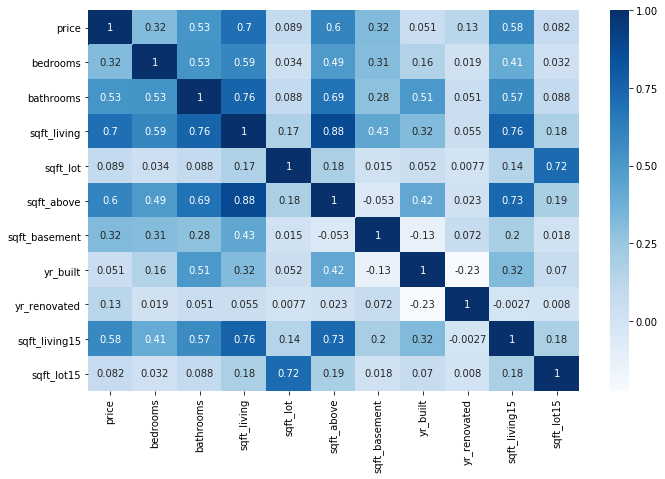

In [31]:
plt.subplots(figsize=(11,7))
sns.heatmap(h_data.corr(), cmap='Blues', annot = True)

### 1. Associations and Correlations between Variables  

Let's analyze now the relationship between the independent variables available in the dataset and the dependent variable that we are trying to predict (i.e., price). These analysis should provide some interesting insights for our regression models.

We'll be using scatterplots and correlations coefficients (e.g., Pearson, Spearman) to explore potential associations between the variables.

   #### a. Continuous Variables  

Let's analyze the relationship between **'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'** and **'price'.** Since variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.

In [32]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462:

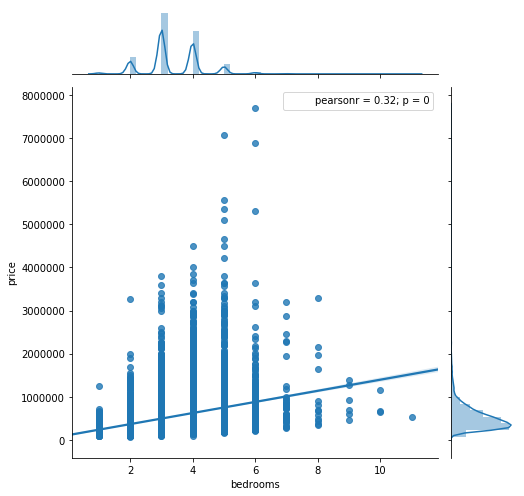

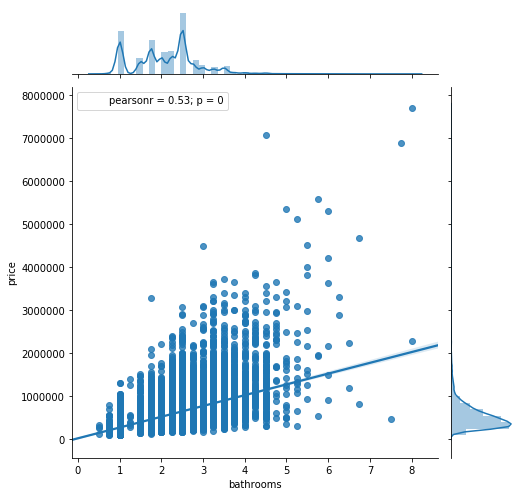

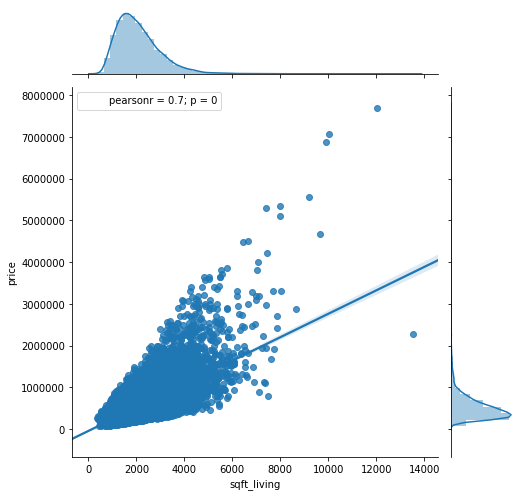

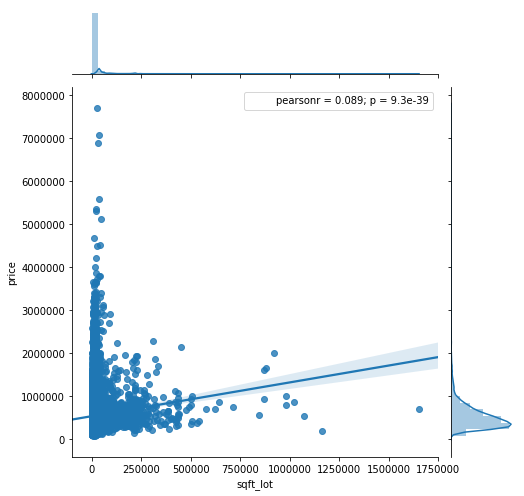

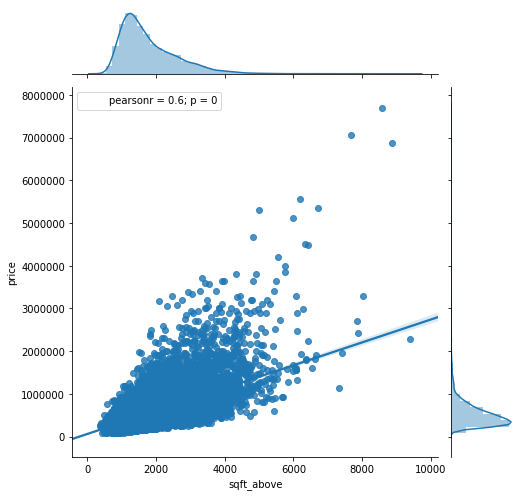

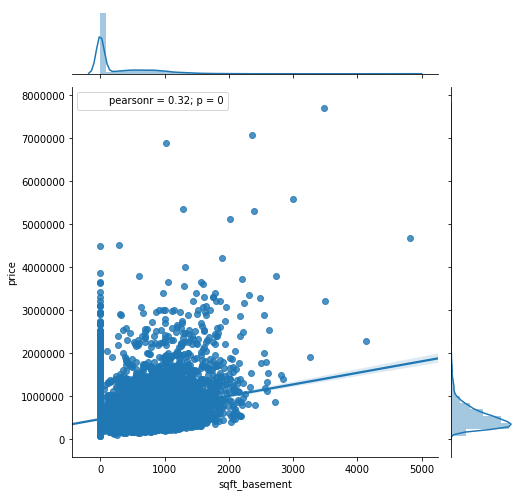

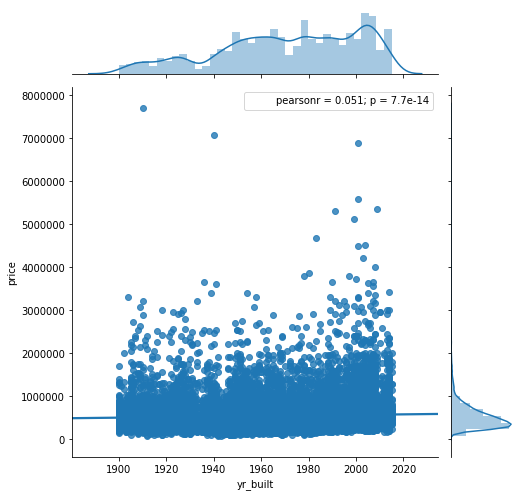

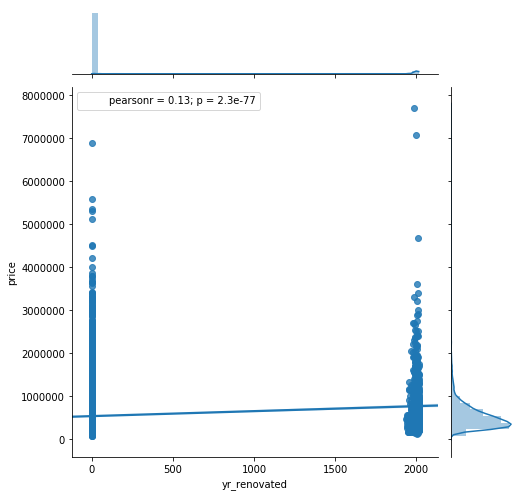

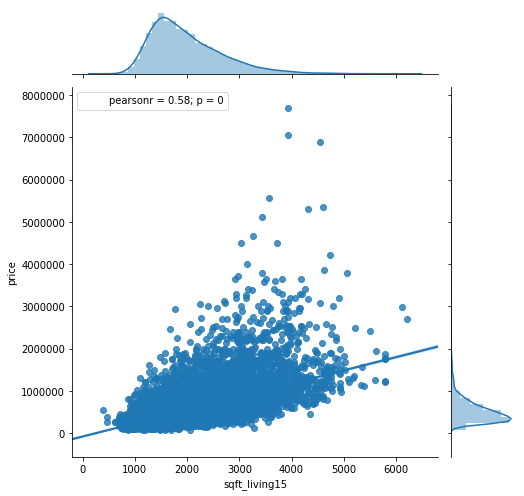

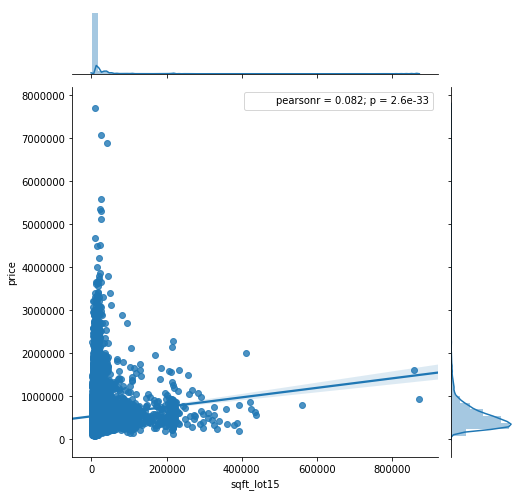

In [33]:
# A joint plot is used to visualize the bivariate distribution
sns.jointplot(x="bedrooms", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="bathrooms", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_living", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_lot", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_above", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_basement", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="yr_built", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="yr_renovated", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_living15", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_lot15", y="price", data=h_data, kind = 'reg', size = 7)
plt.show()

There is a clear linear association **(pearsonr >= 0.5 )** between the variable **'sqft_living' (pearsonr = 0.7), 'sqft_above'  (pearsonr = 0.6), 'sqft_living15' (pearsonr = 0.58), and 'bathrooms'(r = 0.52)** and **'price'**, indicating a strong positive relationship. They should be a good predicator of house price. 

The variables **'bedrooms' (pearsonr = 0.32), 'sqft_basement' (pearsonr = 0.32), 'yr_renovated' (pearsonr = 0.13)** has weak positive correlation with 'price'. 

The variables **sqft_lot(pearsonr = 0.089), sqft_lot15 (pearsonr = 0.082) and yr_built(pearsonr = 0.051)** seem to be poorly related to price. We can see that there is a lot of zeros in the sqft_basement distribution (i.e., no basement). Similarly, there is a lot of zeros in the yr_renovated variable. Let's create new 2 columns **('basement_present', 'renovated')**, and change their types into category.

In [34]:
# Create 2 new columns for the analysis 
h_data['basement_present'] = h_data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) # Indicate whether there is a basement or not
h_data['renovated'] = h_data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) # 1 if the house has been renovated
h_data['basement_present'] = h_data['basement_present'].astype('category')
h_data['renovated'] = h_data['renovated'].astype('category')

In [35]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 19 columns):
price               21419 non-null float64
bedrooms            21419 non-null int64
bathrooms           21419 non-null float64
sqft_living         21419 non-null int64
sqft_lot            21419 non-null int64
floors              21419 non-null category
waterfront          21419 non-null category
view                21419 non-null category
condition           21419 non-null category
grade               21419 non-null category
sqft_above          21419 non-null int64
sqft_basement       21419 non-null int64
yr_built            21419 non-null int64
yr_renovated        21419 non-null int64
zipcode             21419 non-null object
sqft_living15       21419 non-null int64
sqft_lot15          21419 non-null int64
basement_present    21419 non-null category
renovated           21419 non-null category
dtypes: category(7), float64(2), int64(9), object(1)
memory usage: 2.1+ MB


#### b. Categorical Variables  

Let's now analyze the relationship between house price and the categorical variables.

**waterfront**

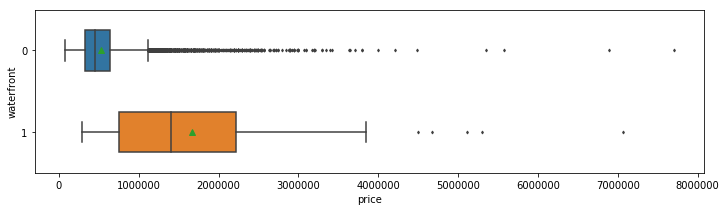

In [36]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(y = 'waterfront', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [37]:
waterfront_d = h_data.groupby('waterfront')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
waterfront_d.sort_values(by='mean')

,mean,min,max,count,std
waterfront,,,,,
0,5.331728e+05,78000.0,7700000.0,21256,3.416181e+05
1,1.661876e+06,285000.0,7062500.0,163,1.120372e+06


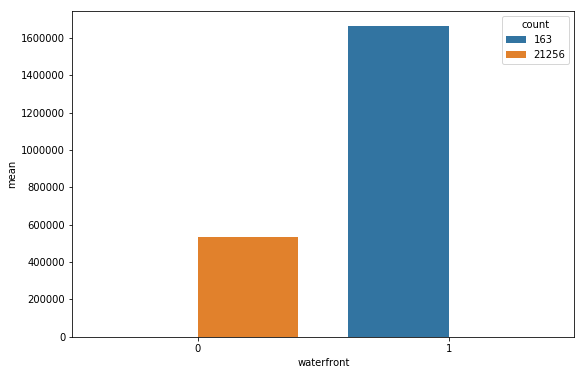

In [38]:
plt.figure(figsize=(9,6))
sns.barplot( waterfront_d.index, 'mean', 'count', data = waterfront_d)
plt.show()

In [39]:
r, p = stats.pointbiserialr(h_data['waterfront'], h_data['price'])
print ('point biserial correlation r between price and waterfront is %s with p = %s' %(r,p))

point biserial correlation r between price and waterfront is 0.26703607773193094 with p = 0.0


**Comments:**

The no waterfront box plot is comparatively short. This suggests that overall, house prices in this group are very close to each other.
The waterfront box plot is comparatively tall. This suggests that house prices differ greatly in this group.
There is obvious shape differences between the two distributions, suggesting a higher sell price, in general, for houses with a waterfront. This is validated by a positive value of the point-biserial correlation.
The correlation if however small (r<0.3). Note that we haven't test here the 3 main assumptions of the point-biserial correlation and can't rely too much on the result (1: There should be no significant outliers in the two groups of the dichotomous variable in terms of the continuous variable, 2: There should be homogeneity of variances, 3: The continuous variable should be approximately normally distributed for each group of the dichotomous variable).


**basement_present**

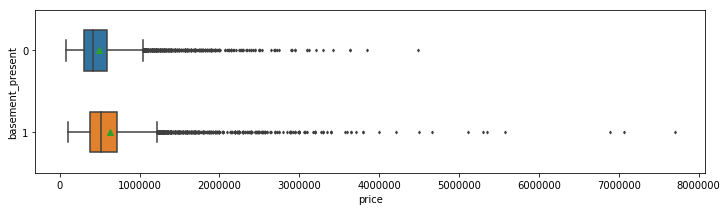

In [40]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(y = 'basement_present', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [41]:
basement_present_d = h_data.groupby('basement_present')['price'].agg(['mean', 'min', 'max', 'count','std'])
basement_present_d.sort_values(by='mean')

,mean,min,max,count,std
basement_present,,,,,
0,488515.826294,78000.0,4489000.0,12999,297379.112362
1,623965.418646,100000.0,7700000.0,8420,442262.585805


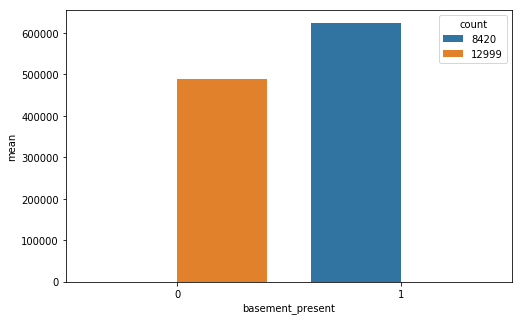

In [42]:
plt.figure(figsize=(8,5))
sns.barplot( basement_present_d.index, 'mean', 'count', data = basement_present_d)
plt.show()

In [43]:
r, p = stats.pointbiserialr(h_data['basement_present'], h_data['price'])
print ('point biserial correlation r between price and basement_present is %s with p = %s' %(r,p))

point biserial correlation r between price and basement_present is 0.18011268796667795 with p = 1.286689922446303e-155


**renovated**

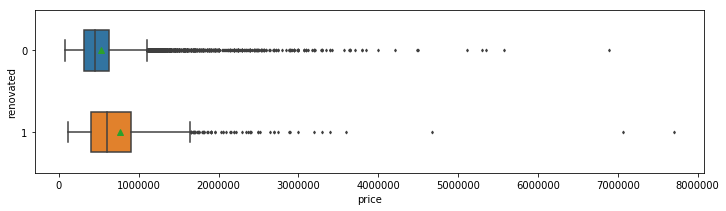

In [44]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(y = 'renovated', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [45]:
renovated_d = h_data.groupby('renovated')['price'].agg(['mean', 'min', 'max', 'count','std'])
renovated_d.sort_values(by='mean')

,mean,min,max,count,std
renovated,,,,,
0,531984.914818,78000.0,6885000.0,20509,349656.223164
1,762118.058242,110000.0,7700000.0,910,608430.783572


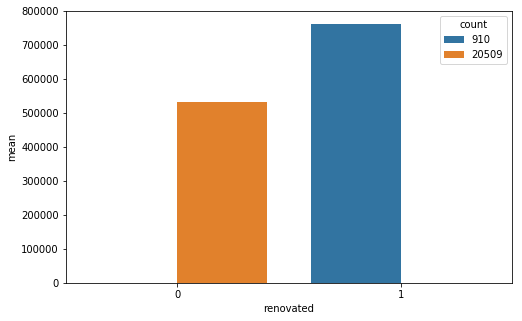

In [46]:
plt.figure(figsize=(8,5))
sns.barplot( renovated_d.index, 'mean', 'count', data = renovated_d)
plt.show()

In [47]:
r, p = stats.pointbiserialr(h_data['renovated'], h_data['price'])
print ('point biserial correlation r between price and renovated is %s with p = %s' %(r,p))

point biserial correlation r between price and renovated is 0.1263652601977615 with p = 5.916855016403926e-77


**floors**

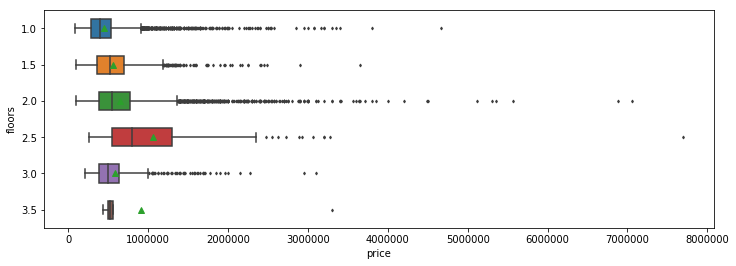

In [48]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'floors', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [49]:
floors_d = h_data.groupby('floors')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
floors_d.sort_values(by='mean', ascending=False)

,mean,min,max,count,std
floors,,,,,
2.5,1.060346e+06,255000.0,7700000.0,161,8.582595e+05
3.5,9.102143e+05,435000.0,3300000.0,7,1.054669e+06
2.0,6.493117e+05,90000.0,7062500.0,8203,4.340177e+05
3.0,5.832602e+05,205000.0,3100000.0,609,3.389904e+05
1.5,5.619477e+05,92000.0,3650000.0,1888,3.034928e+05
1.0,4.439819e+05,78000.0,4668000.0,10551,2.639276e+05


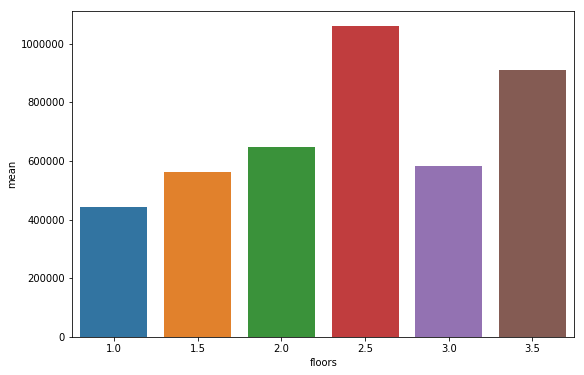

In [50]:
plt.figure(figsize=(9,6))
sns.barplot( floors_d.index, 'mean', data = floors_d)
plt.show()

In [51]:
r, p = stats.spearmanr(h_data['floors'], h_data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))

spearman correlation r between price and floors is 0.3199577246396911 with p = 0.0


**view**

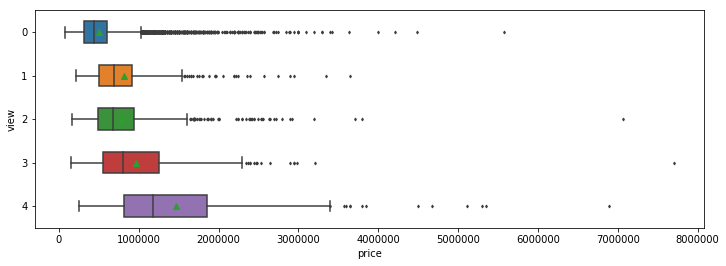

In [52]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'view', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [53]:
view_d = h_data.groupby('view')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
view_d.sort_values(by='mean', ascending=False)

,mean,min,max,count,std
view,,,,,
4,1.465751e+06,252000.0,6885000.0,316,955755.394284
3,9.715104e+05,154000.0,7700000.0,507,613852.966176
1,8.132847e+05,217000.0,3650000.0,331,511395.259933
2,7.930803e+05,169317.0,7062500.0,960,510334.295352
0,4.981983e+05,78000.0,5570000.0,19305,287028.984825


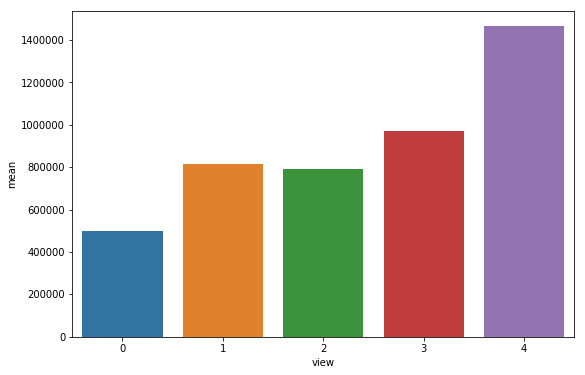

In [54]:
plt.figure(figsize=(9,6))
sns.barplot( view_d.index, 'mean', data = view_d)
plt.show()

In [55]:
r, p = stats.spearmanr(h_data['view'], h_data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))

spearman correlation r between price and view is 0.2933965910631859 with p = 0.0


**condition**

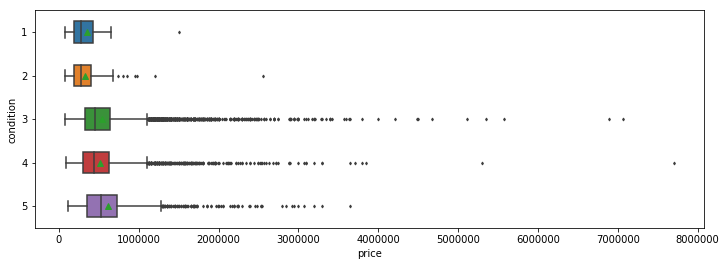

In [56]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'condition', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [57]:
condition_d = h_data.groupby('condition')['price'].agg(['mean', 'min', 'max', 'count','std'])
condition_d.sort_values(by='mean', ascending=False)

,mean,min,max,count,std
condition,,,,,
5,613111.545670,110000.0,3650000.0,1686,410884.734867
3,543854.461942,83000.0,7062500.0,13900,364900.711906
4,522210.459862,89000.0,7700000.0,5643,358171.886173
1,349480.357143,78000.0,1500000.0,28,274653.006112
2,333974.623457,80000.0,2555000.0,162,250749.326239


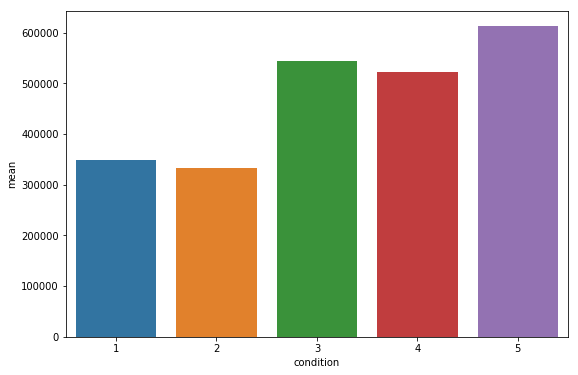

In [58]:
plt.figure(figsize=(9,6))
sns.barplot( condition_d.index, 'mean', data = condition_d)
plt.show()

In [59]:
r, p = stats.spearmanr(h_data['condition'], h_data['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))

spearman correlation r between price and condition is 0.015919929223414054 with p = 0.01980984305569823


**grade**

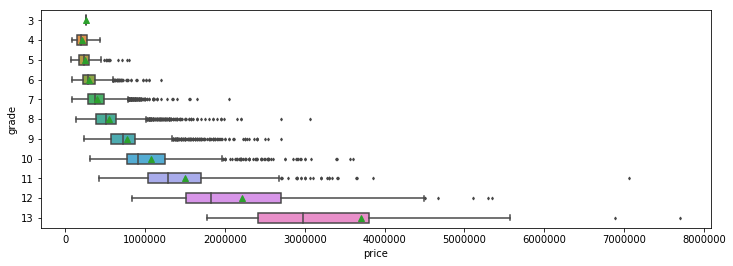

In [60]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'grade', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [61]:
grade_d = h_data.groupby('grade')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
grade_d.sort_values(by='mean', ascending=False)

,mean,min,max,count,std
grade,,,,,
13,3.709615e+06,1780000.0,7700000.0,13,1.859450e+06
12,2.212521e+06,835000.0,5350000.0,88,1.029567e+06
11,1.498242e+06,420000.0,7062500.0,396,7.069597e+05
10,1.071612e+06,316000.0,3600000.0,1130,4.837897e+05
9,7.734201e+05,230000.0,2700000.0,2606,3.157671e+05
8,5.433418e+05,140000.0,3070000.0,6041,2.175537e+05
7,4.036257e+05,90000.0,2050000.0,8888,1.555405e+05
6,3.042484e+05,84000.0,1200000.0,1995,1.226688e+05
3,2.620000e+05,262000.0,262000.0,1,NaN


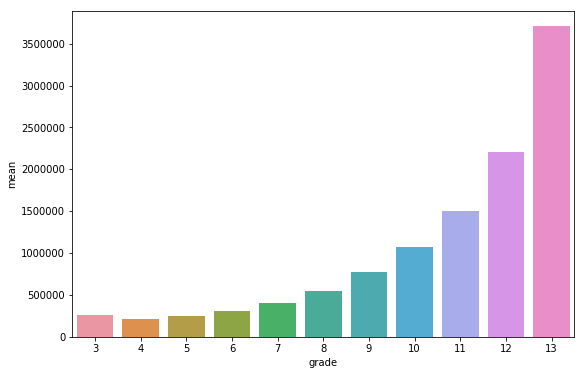

In [62]:
plt.figure(figsize=(9,6))
sns.barplot( grade_d.index, 'mean', data = grade_d)
plt.show()

In [63]:
r, p = stats.spearmanr(h_data['grade'], h_data['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and grade is 0.656470104530906 with p = 0.0


**zipcode**

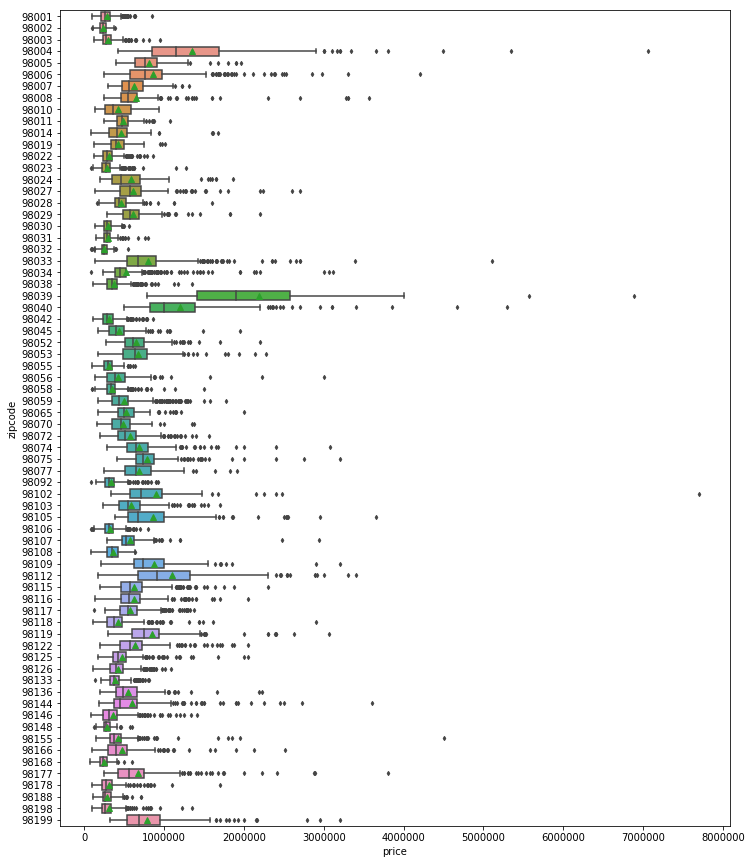

In [64]:
fig = plt.subplots(figsize=(12,15))
sns.boxplot(y = 'zipcode', x = 'price', data = h_data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)

In [65]:
zipcode_d= h_data.groupby('zipcode')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
zipcode_d_10 = zipcode_d.sort_values(by='mean',ascending=False).head(10)
print(type(zipcode_d_10))
zipcode_d_10

<class 'pandas.core.frame.DataFrame'>


,mean,min,max,count,std
zipcode,,,,,
98039,2.186843e+06,787500.0,6885000.0,49,1.163564e+06
98004,1.355387e+06,425000.0,7062500.0,315,7.472826e+05
98040,1.194230e+06,500000.0,5300000.0,282,6.074935e+05
98112,1.096192e+06,169317.0,3400000.0,268,5.947617e+05
98102,8.993954e+05,330000.0,7700000.0,104,7.902389e+05
98109,8.796236e+05,216650.0,3200000.0,109,4.552288e+05
98105,8.628252e+05,380000.0,3650000.0,229,4.772876e+05
98006,8.578753e+05,247500.0,4208000.0,490,4.455127e+05
98119,8.494480e+05,300523.0,3065000.0,184,4.337225e+05


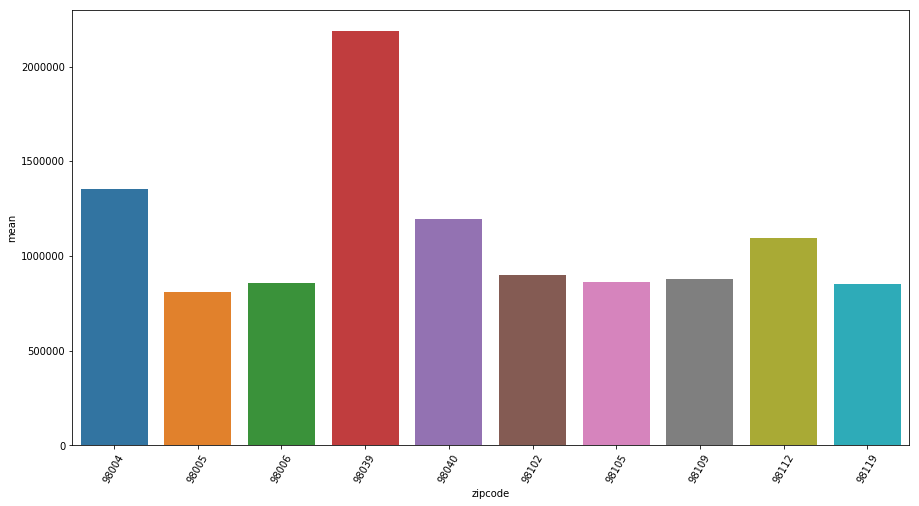

In [66]:
plt.figure(figsize=(15,8))
sns.barplot( zipcode_d_10.index, 'mean', data = zipcode_d_10)
plt.xticks(rotation=60)
plt.show()